In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

sns.set_style("whitegrid")

Read in the data with Pandas

In [2]:
cars = pd.read_csv('Cars93.csv', index_col=0)

cars.head()

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
4,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,Front,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


Check out the data and clean

In [3]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93 entries, 1 to 93
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Manufacturer        93 non-null     object 
 1   Model               93 non-null     object 
 2   Type                93 non-null     object 
 3   Min.Price           93 non-null     float64
 4   Price               93 non-null     float64
 5   Max.Price           93 non-null     float64
 6   MPG.city            93 non-null     int64  
 7   MPG.highway         93 non-null     int64  
 8   AirBags             93 non-null     object 
 9   DriveTrain          93 non-null     object 
 10  Cylinders           93 non-null     object 
 11  EngineSize          93 non-null     float64
 12  Horsepower          93 non-null     int64  
 13  RPM                 93 non-null     int64  
 14  Rev.per.mile        93 non-null     int64  
 15  Man.trans.avail     93 non-null     object 
 16  Fuel.tank.

Remove missing values; drop columns which are not categorical or numeric; separate dependent variable, MPG.highway, from independent variables

In [4]:
cars.dropna(inplace=True)

ind_vars = cars.drop(columns=['Model', 'Make'])
ind_vars['Cylinders'] = ind_vars['Cylinders'].astype(int)

mpg_highway = cars['MPG.highway'].copy()
ind_vars.drop(columns='MPG.highway', inplace=True)

ind_vars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82 entries, 1 to 93
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Manufacturer        82 non-null     object 
 1   Type                82 non-null     object 
 2   Min.Price           82 non-null     float64
 3   Price               82 non-null     float64
 4   Max.Price           82 non-null     float64
 5   MPG.city            82 non-null     int64  
 6   AirBags             82 non-null     object 
 7   DriveTrain          82 non-null     object 
 8   Cylinders           82 non-null     int32  
 9   EngineSize          82 non-null     float64
 10  Horsepower          82 non-null     int64  
 11  RPM                 82 non-null     int64  
 12  Rev.per.mile        82 non-null     int64  
 13  Man.trans.avail     82 non-null     object 
 14  Fuel.tank.capacity  82 non-null     float64
 15  Passengers          82 non-null     int64  
 16  Length    

Make dummy variables for categorical variables, dropping first level

In [5]:
ind_vars = pd.get_dummies(ind_vars, drop_first=True)

ind_vars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82 entries, 1 to 93
Data columns (total 59 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Min.Price                   82 non-null     float64
 1   Price                       82 non-null     float64
 2   Max.Price                   82 non-null     float64
 3   MPG.city                    82 non-null     int64  
 4   Cylinders                   82 non-null     int32  
 5   EngineSize                  82 non-null     float64
 6   Horsepower                  82 non-null     int64  
 7   RPM                         82 non-null     int64  
 8   Rev.per.mile                82 non-null     int64  
 9   Fuel.tank.capacity          82 non-null     float64
 10  Passengers                  82 non-null     int64  
 11  Length                      82 non-null     int64  
 12  Wheelbase                   82 non-null     int64  
 13  Width                       82 non-nu

Split the data into training and test sets

In [6]:
X_train, X_test, y_train, y_test = train_test_split(ind_vars, mpg_highway, test_size=0.25, random_state=0)

Fit a linear regression model on the training data

In [7]:
lm = linear_model.LinearRegression()
lm.fit(X_train, y_train)

print("Model Training Summary")
print("======================")
print(f"Intercept: {lm.intercept_}")
print(f"Coefficients: {lm.coef_}")
print(f"Sample R-Squared: {lm.score(X_train, y_train)}")

Model Training Summary
Intercept: 18.974230329139782
Coefficients: [ 2.31392606e+01 -4.66675670e+01  2.34084412e+01  8.39762510e-01
 -8.26252696e-01 -3.32334485e+00  2.77105186e-02  1.34409855e-04
 -4.82320480e-03  3.64069057e-01 -1.01482785e+00  7.94456356e-02
 -3.51117047e-01  3.59363986e-01  4.88092866e-02 -2.34165281e-01
  7.21938400e-01 -1.82032985e-03 -1.70780589e+00  4.69242090e+00
 -1.89019859e+00  7.04662839e+00  5.47283815e-01  9.97254887e-01
 -7.73726885e-01 -1.42932910e+00 -3.33904204e+00 -1.88234803e+00
 -2.48012773e+00 -4.28568635e+00 -3.13571392e+00  7.81597009e-14
  4.01941647e+00  3.05012704e+00 -4.07460956e+00  1.07143254e+00
 -6.88264933e+00 -6.99171211e+00 -5.47979037e+00 -2.32533384e+00
 -4.08562073e-14 -6.64448674e-01 -8.72120562e+00  4.32526185e+00
  5.93699740e+00 -3.21685837e+00 -7.78992595e+00 -2.22844095e+00
 -6.09525534e-02  1.93628018e+00 -1.48662868e+00 -1.24862039e+00
 -8.21700553e-02  1.26817076e+00  4.74420276e-01  9.44084114e+00
  6.75058434e+00 -2.353

Predict the values on the test set, compare with actual values

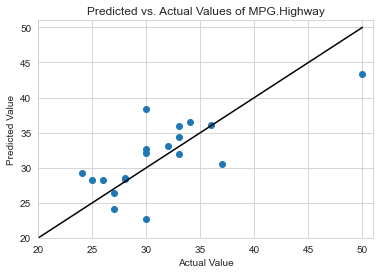

In [32]:
y_hat = lm.predict(X_test)
residuals = y_test - y_hat

plt.scatter(y_test, y_hat)
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")

# Plot line y=x and reformat axes
plt.plot(range(20,51), range(20,51), color="Black")
plt.xlim(20,51)
plt.ylim(20,51)

plt.title("Predicted vs. Actual Values of MPG.Highway")
plt.show()

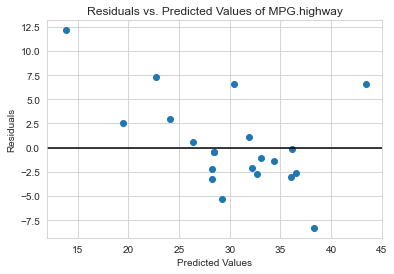

In [38]:
plt.scatter(y_hat, residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")

# Plot line y=0 and format axes
plt.plot(range(12,46), np.zeros(46-12), color="black")
plt.xlim(12, 45)

plt.title("Residuals vs. Predicted Values of MPG.highway")
plt.show()

Get the coefficient of determination of the model

In [10]:
r_squared = lm.score(X_test, y_test)
print(f"Model R-squared on test dataset: {r_squared}")
test_mse = mean_squared_error(y_test, y_hat)
print(f"Model MSE on the test dataset: {test_mse}")

Model R-squared on test dataset: 0.37043905565074153
Model MSE on the test dataset: 21.26231452412212


It looks like this model is overfitting pretty heavily, let's see if a penalized regression method does better. Let's try LASSO

In [14]:
# Standardzie predictors
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
std_X_train = std.fit_transform(X_train)
std_X_test = std.fit_transform(X_test)

# Fit model on standardized data
lasso = linear_model.LassoCV()
lasso.fit(std_X_train, y_train)

print("Model Training Summary")
print("======================")
print(f"Number of Iterations: {std_lasso.n_iter_}")
print(f"Intercept: {std_lasso.intercept_}")
print(f"Coefficients: {std_lasso.coef_}")
print(f"Regularization Strength: {std_lasso.alpha_}")
print(f"In-sample R-Squared: {std_lasso.score(std_X_train, y_train)}")

Model Training Summary
Number of Iterations: 22
Intercept: 29.78688524590164
Coefficients: [-0.00000000e+00 -0.00000000e+00 -2.56489678e-03  4.22144985e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
  2.09597811e-01 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
  4.65983441e-02  0.00000000e+00  3.73097596e-01  0.00000000e+00
 -1.80971694e-01 -2.48944820e-01 -0.00000000e+00 -9.63959584e-02
  0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -1.75548117e-01  0.00000000e+00  1.96188422e-01 -0.00000000e+00
 -2.88801384e-01 -1.66979176e-01 -1.31946323e-01  3.69387965e-02
  0.00000000e+00  3.27305470e-01 -4.79080581e-02  3.88490483e-01
 -7.09709546e-02  0.00000000e+00 -0.00000000e+00  8.17094017e-02
  0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00  1.34082797e-02 -0.00000000e+00  0.00000000e+00

Assess out-of-sample performance of LASSO on standardized features

Out-of-sample R-Squared: 0.8778223111802167
Out-of-sample MSE: 4.12633672853028


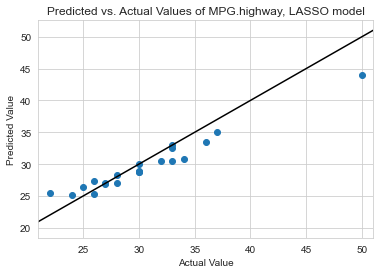

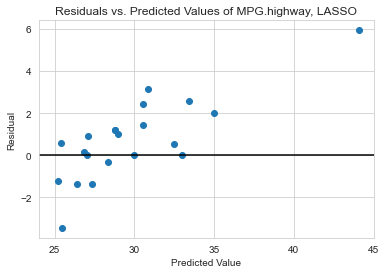

In [45]:
lasso_y_hat = lasso.predict(std_X_test)
lasso_residuals = y_test - lasso_y_hat

print(f"Out-of-sample R-Squared: {lasso.score(std_X_test, y_test)}")
print(f"Out-of-sample MSE: {mean_squared_error(y_test, lasso_y_hat)}")

plt.scatter(y_test, lasso_y_hat)
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.plot(range(20, 52), range(20, 52), color='black')
plt.xlim(21, 51)
plt.title("Predicted vs. Actual Values of MPG.highway, LASSO model")
plt.show()

plt.scatter(lasso_y_hat, lasso_residuals)
plt.xlabel("Predicted Value")
plt.ylabel("Residual")
plt.plot(range(23, 46), np.zeros(46-23), color='black')
plt.xlim(24, 45)
plt.xticks(range(25,46,5))
plt.title("Residuals vs. Predicted Values of MPG.highway, LASSO")
plt.show()

LASSO performs much better out-of-sample than unpenalized regression did, and definitely doesn't seem to have the same overfitting problem. However, the pattern of residuals indicates non-linearity in the data, and the model performance could still be improved. It would be interesting to see how a more flexible class of models performs on this dataset. In any case that's a project for another time.